# Tutorials Pytorch Audio

 - https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html
 - https://keithito.com/LJ-Speech-Dataset/
 - https://microsoft.github.io/ELL/tutorials/Training-audio-keyword-spotter-with-pytorch/

##Primeiramente vamos instalar as bibliotecas necessárias


In [1]:
#instalando o torchaudio
!pip install -U torch torchaudio

     |████████████████████████████████| 831.4 MB 6.3 kB/s 
     |████████████████████████████████| 1.9 MB 57.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu111 requires torch==1.9.0, but you have torch 1.9.1 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.9.1 which is incompatible.


In [2]:
#instalando o pydub
!pip install pydub

In [3]:
#instalando o ffmpeg
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


## Agora vamos converter o áudio gravado de mp3 para wav


In [4]:
from os import path
from pydub import AudioSegment

# files                                                                    
src = "original.mp3"
dst = "modified.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='modified.wav'>

## Lendo o áudio
  - Tamanho da forma de onda
  - Taxa de amostragem da forma de onda

In [5]:
import torch
import torchaudio


torchaudio.set_audio_backend("sox_io")
waveform, sample_rate = torchaudio.load(dst)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

Shape of waveform: torch.Size([2, 635904])
Sample rate of waveform: 48000


In [6]:
# Let's check if the tensor is in the interval [-1,1]
print(f"Min of waveform: {waveform.min()}")
print(f"Max of waveform: {waveform.max()}")
print(f"Mean of waveform: {waveform.mean()}")

Min of waveform: -0.635223388671875
Max of waveform: 0.7105712890625
Mean of waveform: 1.957587846845854e-05


## Graphic serie audio

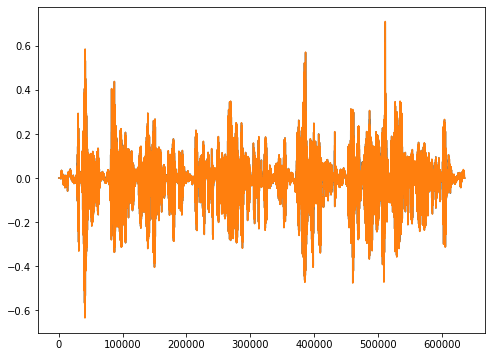

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(waveform.t().numpy())
plt.show()

## Load to listen

In [8]:
import IPython.display as ipd

ipd.Audio(dst)

## Show colors to cmap

## torchaudio supports a growing list of transformations.

 - **Resample**: Resample waveform to a different sample rate.
 - **Spectrogram**: Create a spectrogram from a waveform.
 - **GriffinLim**: Compute waveform from a linear scale magnitude spectrogram using the Griffin-Lim transformation.
 - **ComputeDeltas**: Compute delta coefficients of a tensor, usually a spectrogram.
 - **ComplexNorm**: Compute the norm of a complex tensor.
 - **MelScale**: This turns a normal STFT into a Mel-frequency STFT, using a conversion matrix.
 - **AmplitudeToDB**: This turns a spectrogram from the power/amplitude scale to the decibel scale.
 - **MFCC**: Create the Mel-frequency cepstrum coefficients from a waveform.
 - **MelSpectrogram**: Create MEL Spectrograms from a waveform using the STFT function in PyTorch.
 - **MuLawEncoding**: Encode waveform based on mu-law companding.
 - **MuLawDecoding**: Decode mu-law encoded waveform.
 - **TimeStretch**: Stretch a spectrogram in time without modifying pitch for a given rate.
 - **FrequencyMasking**: Apply masking to a spectrogram in the frequency domain.
 - **TimeMasking**: Apply masking to a spectrogram in the time domain.

### Transforms **Spectrogram** with cmap='Spectral'

Shape of spectrogram: torch.Size([2, 201, 3180])


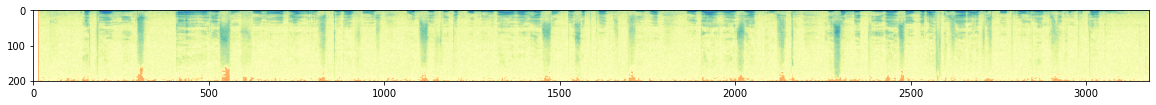

In [9]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(20,10))
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='Spectral')
plt.show()

### Transforms **Spectrogram** with cmap='gray'

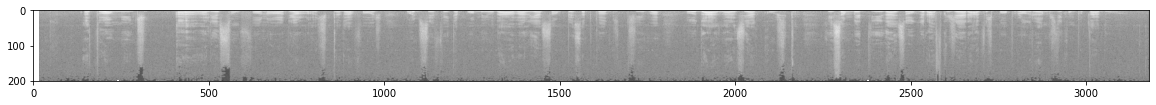

In [10]:
plt.figure(figsize=(20,10))
plt.imshow(specgram.log2()[1,:,:].numpy(), cmap='gray')
plt.show()

### Transforms **MelSpectrogram** with cmap='Default'

/usr/local/lib/python3.7/dist-packages/torchaudio/functional/functional.py:433: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


Shape of spectrogram: torch.Size([2, 128, 3180])


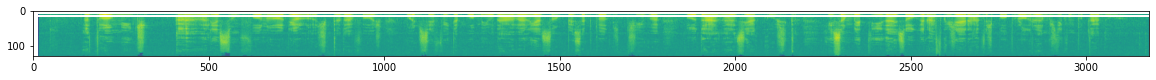

In [11]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)
print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(20,10))
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy())
plt.show()

Shape of transformed waveform: torch.Size([1, 63591])


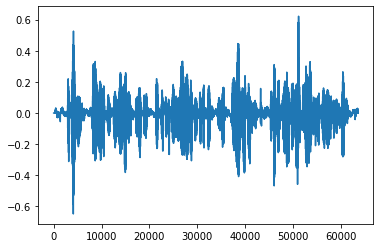

In [12]:
new_sample_rate = sample_rate / 10

# Since Resample applies to a single channel, we resample first channel here
channel = 0
transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())
plt.show()

### Normalize waveform

In [13]:
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean / tensor_minusmean.abs().max()
# Let's normalize to the full interval [-1,1]
waveform = normalize(waveform)

### Audio Original

Min of waveform: -0.8940136432647705
Max of waveform: 1.0
Mean of waveform: 7.498571208408578e-11


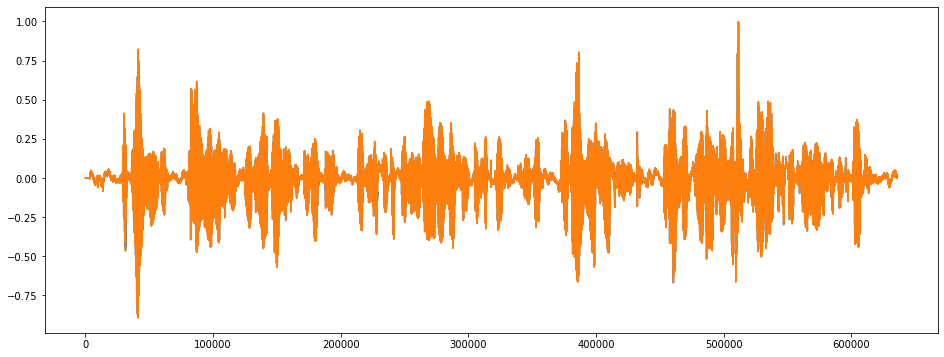

In [14]:
print(f"Min of waveform: {waveform.min()}")
print(f"Max of waveform: {waveform.max()}")
print(f"Mean of waveform: {waveform.mean()}")
plt.figure(figsize=(16, 6))
plt.plot(waveform.t().numpy())
plt.show()

### Functional **gain**

Min of gain_waveform: -1.589806079864502
Max of gain_waveform: 1.778279423713684
Mean of gain_waveform: 5.773900108030361e-11


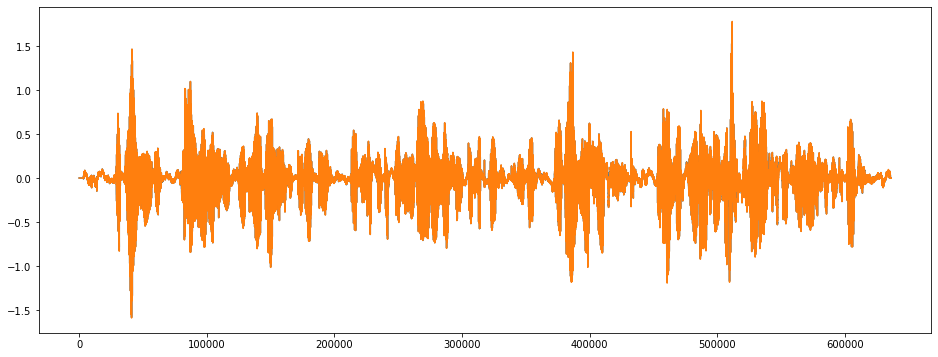

In [15]:
gain_waveform = torchaudio.functional.gain(waveform, gain_db=5.0)
print(f"Min of gain_waveform: {gain_waveform.min()}")
print(f"Max of gain_waveform: {gain_waveform.max()}")
print(f"Mean of gain_waveform: {gain_waveform.mean()}")
plt.figure(figsize=(16, 6))
plt.plot(gain_waveform.t().numpy())
plt.show()

### Functional **lowpass_biquad**

Min of lowpass_waveform: -0.8913789391517639
Max of lowpass_waveform: 0.961233913898468
Mean of lowpass_waveform: 5.668919778045733e-10


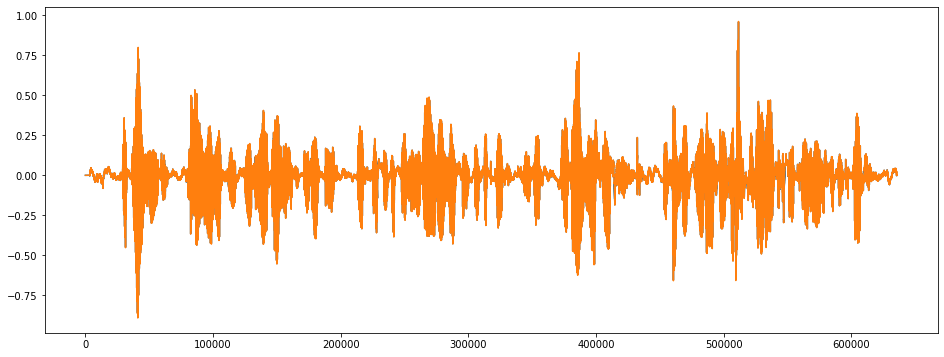

In [16]:
lowpass_waveform = torchaudio.functional.lowpass_biquad(waveform, sample_rate, cutoff_freq=3000)
print(f"Min of lowpass_waveform: {lowpass_waveform.min()}")
print(f"Max of lowpass_waveform: {lowpass_waveform.max()}")
print(f"Mean of lowpass_waveform: {lowpass_waveform.mean()}")
plt.figure(figsize=(16, 6))
plt.plot(lowpass_waveform.t().numpy())
plt.show()

### Functional **highpass_biquad**

Min of highpass_waveform: -0.4322155714035034
Max of highpass_waveform: 0.435232937335968
Mean of highpass_waveform: -8.12470202227189e-10


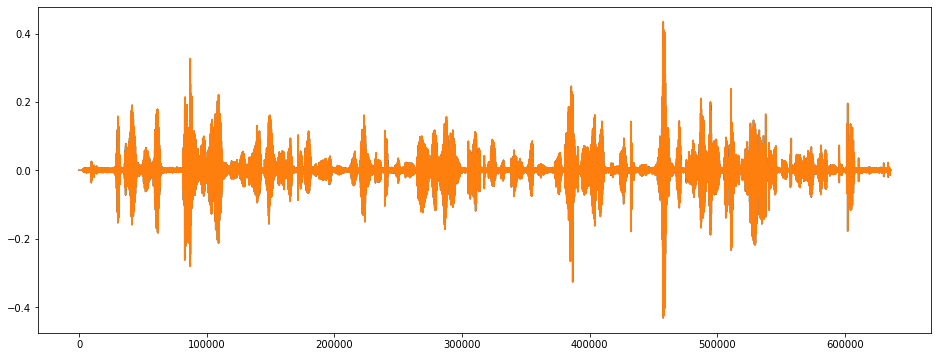

In [17]:
highpass_waveform = torchaudio.functional.highpass_biquad(waveform, sample_rate, cutoff_freq=2000)
print(f"Min of highpass_waveform: {highpass_waveform.min()}")
print(f"Max of highpass_waveform: {highpass_waveform.max()}")
print(f"Mean of highpass_waveform: {highpass_waveform.mean()}")
plt.figure(figsize=(16, 6))
plt.plot(highpass_waveform.t().numpy())
plt.show()